This is a big mart sales prediction with python

**Work FLow**

Data -> Data Pre-processing -> Data Analysis -> Train-test split -> Model(XGBoost Regressor) -> Evalualtion

Import dependencies

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor

Data collection and Processing

In [6]:
sales_data = pd.read_csv("Train.csv")

In [7]:
sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
sales_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
sales_data.shape


(8523, 12)

-Categorical Feature:
1) Item Identifier
2) Item_Fat_Content
3) Item_Type
4) Outlet_Identifier
5) Outlet_Size
6) Outlet_Location_Type
7) Outlet_Type

Handling Missing Values

Mean ->average value 
Mode -> Most repeated value

In [7]:
#mean value of "Item Name " column
sales_data['Item_Weight'].mean()

12.857645184135976

In [8]:
#filling the missing values in 'Item Weight column with 'mean' value
sales_data['Item_Weight'].fillna(sales_data['Item_Weight'].mean(), inplace =True)

C:\Users\hp\AppData\Local\Temp\ipykernel_19240\2348265834.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_data['Item_Weight'].fillna(sales_data['Item_Weight'].mean(), inplace =True)


In [9]:
sales_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
#replacing the missing values in 'Outlet size' with mode
mode_outlet = sales_data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x: x.mode()))

In [11]:
print(mode_outlet)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [12]:
missing_values= sales_data['Outlet_Size'].isnull()

In [13]:
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [14]:
sales_data['Item_Identifier']

0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object

In [9]:
sales_data['Item_Identifier'] = sales_data['Item_Identifier'].str.slice(0,2)

In [16]:
#replacing the output size with the mode of the data
sales_data['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [10]:
sales_data['Outlet_Size'].fillna('Medium',inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_19240\1825802906.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_data['Outlet_Size'].fillna('Medium',inplace=True)


In [18]:
sales_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [19]:
#need to convert the data into numerical data
sales_data['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [20]:
sales_data['Outlet_Size'].value_counts()

Outlet_Size
Medium    5203
Small     2388
High       932
Name: count, dtype: int64

In [21]:
sales_data['Outlet_Size'].value_counts()

Outlet_Size
Medium    5203
Small     2388
High       932
Name: count, dtype: int64

In [11]:
sales_data['Outlet_Identifier'] = sales_data['Outlet_Identifier'].str.slice(-2,)

In [12]:
sales_data = sales_data.replace({'Item_Identifier':{'FD':1,'NC':2,'DR':3},'Item_Type':{'Others':0,'Fruits and Vegetables':1,'Snack Foods':2,'Household':3,'Frozen Foods':4,'Dairy':5,'Canned':6,'Baking Goods':7,'Health and Hygiene':8,'Soft Drinks':9,'Meat':10,'Breads':11,'Hard Drinks':12,'Starchy Foods':13,'Breakfast':14,'Seafood':15},'Outlet_Type':{'Supermarket Type1':1,'Grocery Store':2,'Supermarket Type3':3,'Supermarket Type2':4},'Outlet_Location_Type':{'Tier 1':1,'Tier 2':2,'Tier 3':3},'Item_Fat_Content':{'Low Fat':1,'Regular':2,'LF':3,'reg':4,'low fat':5},'Outlet_Size':{'Small':0,'Medium':1,'High':2}})

C:\Users\hp\AppData\Local\Temp\ipykernel_19240\2082034425.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sales_data = sales_data.replace({'Item_Identifier':{'FD':1,'NC':2,'DR':3},'Item_Type':{'Others':0,'Fruits and Vegetables':1,'Snack Foods':2,'Household':3,'Frozen Foods':4,'Dairy':5,'Canned':6,'Baking Goods':7,'Health and Hygiene':8,'Soft Drinks':9,'Meat':10,'Breads':11,'Hard Drinks':12,'Starchy Foods':13,'Breakfast':14,'Seafood':15},'Outlet_Type':{'Supermarket Type1':1,'Grocery Store':2,'Supermarket Type3':3,'Supermarket Type2':4},'Outlet_Location_Type':{'Tier 1':1,'Tier 2':2,'Tier 3':3},'Item_Fat_Content':{'Low Fat':1,'Regular':2,'LF':3,'reg':4,'low fat':5},'Outlet_Size':{'Small':0,'Medium':1,'High':2}})


Data Visualization

In [24]:
sns.set()

<Figure size 600x600 with 0 Axes>

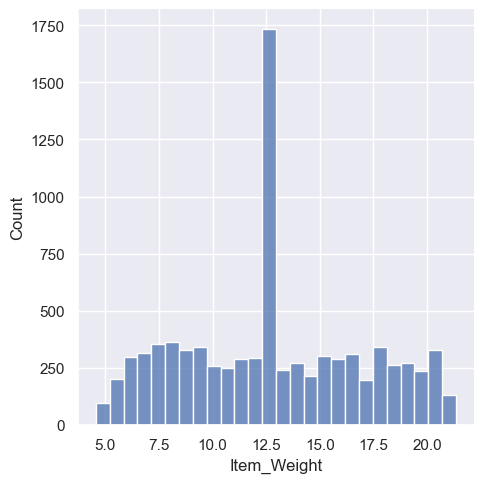

In [25]:
plt.figure(figsize=(6,6))
sns.displot(sales_data['Item_Weight'])
plt.show()

<Figure size 600x600 with 0 Axes>

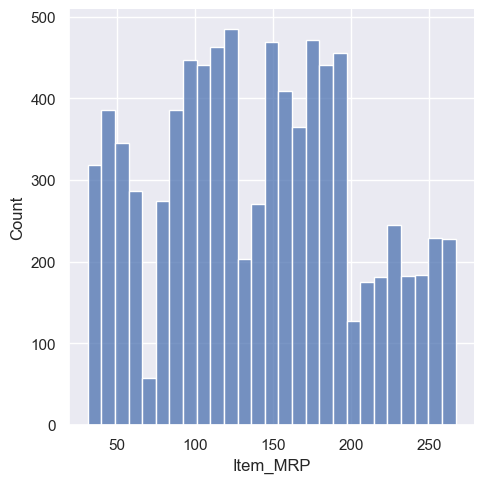

In [26]:
plt.figure(figsize=(6,6))
sns.displot(sales_data['Item_MRP'])
plt.show()

<Figure size 600x600 with 0 Axes>

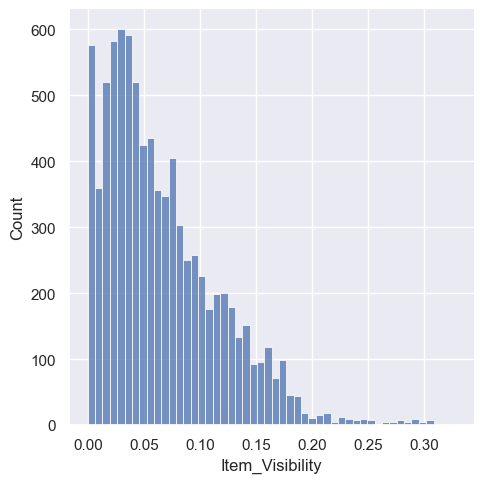

In [27]:
plt.figure(figsize=(6,6))
sns.displot(sales_data['Item_Visibility'])
plt.show()

Data Split

In [13]:
X = sales_data.drop(columns=['Outlet_Establishment_Year','Outlet_Identifier','Item_Outlet_Sales'],axis=1)
Y = sales_data['Item_Outlet_Sales']

In [14]:
X

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1,9.300,1,0.016047,5,249.8092,1,1,1
1,3,5.920,2,0.019278,9,48.2692,1,3,4
2,1,17.500,1,0.016760,10,141.6180,1,1,1
3,1,19.200,2,0.000000,1,182.0950,1,3,2
4,2,8.930,1,0.000000,3,53.8614,2,3,1
...,...,...,...,...,...,...,...,...,...
8518,1,6.865,1,0.056783,2,214.5218,2,3,1
8519,1,8.380,2,0.046982,7,108.1570,1,2,1
8520,2,10.600,1,0.035186,8,85.1224,0,2,1
8521,1,7.210,2,0.145221,2,103.1332,1,3,4


Train_Test_Split

In [15]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [31]:
X_train.shape

(6818, 9)

In [32]:
Y_train

1945    5369.0112
1720    1230.3984
1954    4250.4672
1919    1482.0708
2461    2348.9424
          ...    
2895     473.3838
7813     109.1912
905     2247.0750
5192      44.6086
235     2293.0152
Name: Item_Outlet_Sales, Length: 6818, dtype: float64

In [33]:
X_train.dtypes

Item_Identifier           int64
Item_Weight             float64
Item_Fat_Content          int64
Item_Visibility         float64
Item_Type                 int64
Item_MRP                float64
Outlet_Size               int64
Outlet_Location_Type      int64
Outlet_Type               int64
dtype: object

In [34]:
X['Item_Type'].value_counts()

Item_Type
1     1232
2     1200
3      910
4      856
5      682
6      649
7      648
8      520
9      445
10     425
11     251
12     214
0      169
13     148
14     110
15      64
Name: count, dtype: int64

Model Training

In [16]:
model =XGBRegressor(enable_categorical=True)

In [17]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Model Analyis

In [18]:
X_train_prediction = model.predict(X_train)
X_train_error = metrics.r2_score(Y_train,X_train_prediction)
print("The error in the training dataset is :",X_train_error)

X_test_prediction = model.predict(X_test)
X_test_error = metrics.r2_score(Y_test,X_test_prediction)
print("The error in the test dataset is :",X_test_error)

The error in the training dataset is : 0.8648549899746371
The error in the test dataset is : 0.5013524337705433


Model Visualization

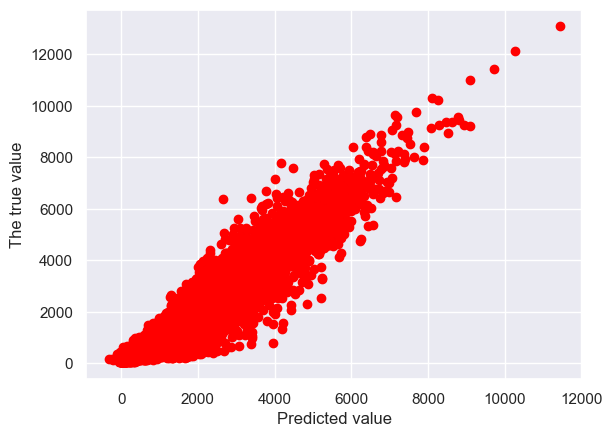

In [44]:
plt.scatter(X_train_prediction,Y_train,color=['red'])
plt.xlabel("Predicted value")
plt.ylabel("The true value")
plt.show()

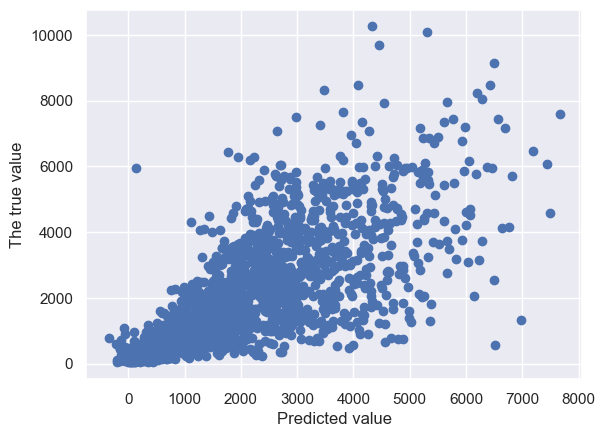

In [39]:
plt.scatter(X_test_prediction,Y_test)
plt.xlabel("Predicted value")
plt.ylabel("The true value")
plt.show()

Predictive Model

In [32]:
input_data =['FDH17',16.2,'Regular',0.016687114,'Frozen Foods',96.9726,'Medium','Tier 2','Supermarket Type1']
input_data[0] = input_data[0][0:2]

#sales_data = sales_data.replace({'Item_Identifier':{'FD':1,'NC':2,'DR':3},'Item_Type':{'Others':0,'Fruits and Vegetables':1,'Snack Foods':2,'Household':3,'Frozen Foods':4,'Dairy':5,'Canned':6,'Baking Goods':7,'Health and Hygiene':8,'Soft Drinks':9,'Meat':10,'Breads':11,'Hard Drinks':12,'Starchy Foods':13,'Breakfast':14,'Seafood':15},'Outlet_Type':{'Supermarket Type1':1,'Grocery Store':2,'Supermarket Type3':3,'Supermarket Type2':4},'Outlet_Location_Type':{'Tier 1':1,'Tier 2':2,'Tier 3':3},'Item_Fat_Content':{'Low Fat':1,'Regular':2,'LF':3,'reg':4,'low fat':5},'Outlet_Size':{'Small':0,'Medium':1,'High':2}})

#'Item_Identifier':{'FD':1,'NC':2,'DR':3}
if(input_data[0] == 'FD'):
    input_data[0] = 1
elif(input_data[0] == 'NC'):
    input_data[0] = 2
elif(input_data[0] == 'DR'):
    input_data[0] = 3


#{'Low Fat':1,'Regular':2,'LF':3,'reg':4,'low fat':5}
if(input_data[2] == 'Low Fat'):
    input_data[2] = 1
elif(input_data[2] == 'Regular'):
    input_data[2] = 2
elif(input_data[2] == 'Low Fat'):
    input_data[2] = 3
elif(input_data[2] == 'reg'):
    input_data[2] = 4
elif(input_data[2] == 'low fat'):
    input_data[2] = 5

#Item_Type':{'Others':0,'Fruits and Vegetables':1,'Snack Foods':2,'Household':3,'Frozen Foods':4,'Dairy':5,'Canned':6,'Baking Goods':7,'Health and Hygiene':8,'Soft Drinks':9,'Meat':10,'Breads':11,'Hard Drinks':12,'Starchy Foods':13,'Breakfast':14,'Seafood':15}
if(input_data[4] == 'Others'):
    input_data[4] = 0
elif(input_data[4] == 'Fruits and Vegetables'):
    input_data[4] = 1
elif(input_data[4] == 'Snack Foods'):
    input_data[4] = 2
elif(input_data[4] == 'Household'):
    input_data[4] = 3
elif(input_data[4] == 'Frozen Foods'):
    input_data[4] = 4
elif(input_data[4] == 'Dairy'):
    input_data[4] = 5
elif(input_data[4] == 'Canned'):
    input_data[4] = 6
elif(input_data[4] == 'Baking Goods'):
    input_data[4] = 7
elif(input_data[4] == 'Health and Hygiene'):
    input_data[4] = 8
elif(input_data[4] == 'Soft Drinks'):
    input_data[4] = 9
elif(input_data[4] == 'Meat'):
    input_data[4] = 10
elif(input_data[4] == 'Breads'):
    input_data[4] = 11
elif(input_data[4] == 'Hard Drinks'):
    input_data[4] = 12
elif(input_data[4] == 'Starchy Foods'):
    input_data[4] = 13
elif(input_data[4] == 'Breakfast'):
    input_data[4] = 14
elif(input_data[4] == 'Seafood'):
    input_data[4] = 15

#Supermarket Type1':1,'Grocery Store':2,'Supermarket Type3':3,'Supermarket Type2':4
if(input_data[8] == 'Supermarket Type1'):
    input_data[8] = 1
elif(input_data[8] == 'Grocery Store'):
    input_data[8] = 2
elif(input_data[8] == 'Supermarket Type3'):
    input_data[8] = 3
elif(input_data[8] == 'Supermarket Type2'):
    input_data[8] = 4

#Outlet_Location_Type':{'Tier 1':1,'Tier 2':2,'Tier 3':3}
if(input_data[7] == 'Tier 1'):
    input_data[7] = 1
elif(input_data[7] == 'Tier 2'):
    input_data[7] = 2
elif(input_data[7] == 'Tier 3'):
    input_data[7] = 3

#Outlet_Size':{'Small':0,'Medium':1,'High':2
if(input_data[6] == 'Small'):
    input_data[6] = 0
elif(input_data[6] == 'Medium'):
    input_data[6] = 1
elif(input_data[6] == 'High'):
    input_data[6] = 2


input_data_np = np.asanyarray(input_data)
input_reshaped = input_data_np.reshape(1,-1)

prediction =model.predict(input_reshaped)
print(" The predicted sales for the following is :",prediction)

 The predicted sales for the following is : [1462.7843]
